# Analysis of AMD & Intel Processors

Computers have 4 main parts:
1. **CPU** - Central Processing Unit
2. **GPU** - Graphics Processing Unit
3. **RAM** - Random Access Memory
4. **Storage** - For storing files and data

These parts work in combination to give us a modern-day computer experience.  

## CPU
> Brain of the Computer

CPUs are responsible for processing instructions passed to it and performing tasks based on the these instructions

### Specifications
1. **Brand**
   - AMD
   - Intel
   - ARM
2. **Clock Speeds**
   - Base
   - Turbo
3. **Caches**
   - L1
   - L2
   - L3
   - Proprietary Tech
4. **Threads**
5. **Core Count**
6. **Price**
7. **Benchmarks**
8. **Main Use-case**
   - Desktop
   - Server
   - Laptop
9. **TDP**

# Aim
To compare growth in performance by **AMD** & **Intel** over the course of *~20 years* 
<br>
**Time Period:** 1999-2021

### Importing Libraries

In [1]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import markers as pltmark
import seaborn as sns

In [2]:
# seaborn setup
sns.set_theme(context='paper', style='darkgrid')
brand_only_palette = sns.color_palette(['#ed1c24','#0071c5'])

# Statistical Methods
1. **Mean**: Statistical Average for a given set of data \\[ \frac{\sum fx}{\sum f} \\]
2. **Median**: Value at the centre for the given set of data \\[ M_d = l + \frac{\frac{N}{2} - c}{f}\cdot h \\]
3. **Mode**: Most Commonly occuring value \\[ M_o = l + \frac{f_1 - f_0}{2f_1 - f_0 - f_2}\cdot h \\]
4. **Standard Deviation** \\[\sigma_a = \sqrt{\frac{1}{n}\sum(a-\bar{a})^2}\\]
5. **Karl Pearson's Coefficient of Correlation**: Measure of correlation between 2 sets of data \\[ r = \frac{Cov(x,y)}{\sigma_x\cdot\sigma_y} \\]
6. **Line's of Regression**: Plots for correlation \\[ (y-\bar{y}) = b_{yx}(x-\bar{x}) \\]
7. **Spearman's Rank Constant**: Correlation between ranks of 2 quantitative characteristics \\[ P = 1 - \frac{6\sum D^2}{N(N^2 - 1)} \\]

# Process

## Read & Pre-process datasets
We first read the datasets which are stored in their respective '.csv' files

**Datasets Used**
- [🟦Intel & AMD🟥 Processors Full Specs](https://www.kaggle.com/datasets/alanjo/amd-processor-specifications)
- [💥CPU Benchmarks Compilation📊](https://www.kaggle.com/datasets/alanjo/cpu-benchmarks/)

### Read & Store csv files
1. `amd` : Data on AMD Processors
2. `intel` : Data on Intel Processors
3. `benchmark` : Data from benchmarking

In [3]:
amd = pd.read_csv("datasets/AMDfullspecs_adjusted.csv")
intel = pd.read_csv("datasets/INTELpartialspecs_adjusted.csv")
benchmark = pd.read_csv("datasets/CPU_benchmark_v4.csv")

In [4]:
amd.info(False, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Columns: 30 entries, model to thermalSolution
dtypes: float64(19), object(11)
memory usage: 136.5+ KB


In [5]:
intel.info(False, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 12 entries, product to integratedG
dtypes: float64(7), int64(1), object(4)
memory usage: 270.1+ KB


In [6]:
benchmark.info(False, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Columns: 12 entries, cpuName to category
dtypes: float64(4), int64(4), object(4)
memory usage: 358.7+ KB


### Data Cleaning
1. `amd`
    1. Remove 'AMD' from `model`
    2. Remove `amd` rows having `launchDate` & `numCores` as `NaN`
    3. Rename Columns
        1. `numCores` ----> `cores`
        2. `numThreads` --> `threads`
        3. `launchDate` --> `releaseDate`
    4. Set `maxboostClock` value to `baseClock` in cases of NaN
    5. Set `baseClock` value to `maxboostClock` in cases of NaN        
        
        
2. `intel`
    1. Remove `intel` rows having `launchDate` as `NaN`
    2. Rename Columns
        1. `product` --------> `model`
        2. `maxTurboClock` --> `maxboostClock`
        3. `integratedG` ----> `graphicsModel`
    3. Set `maxboostClock` value to `baseClock` in cases of NaN

In [7]:
# column names dictionary
column_names = {
    'AMD': {
        'numCores'   : 'cores',
        'numThreads' : 'threads',
        'launchDate' : 'releaseDate'
    },
    'Intel': {
        'product'      : 'model',
        'maxTurboClock': 'maxboostClock',
        'integratedG'  : 'graphicsModel'
    }
}

# Copying datasets
amd_clean   = amd.copy()
intel_clean = intel.copy()

In [8]:
# Removing 'AMD' from model names
amd_clean.model = [i[4:].strip() if 'AMD' in i else i.strip() for i in amd.model]

# Removing NaN Launch Dates
amd_clean.dropna(subset=["launchDate"], inplace=True)

# Replace NaN with baseClock entries in maxboostClock
amd_clean["maxboostClock"] = amd_clean["maxboostClock"].mask(amd_clean["maxboostClock"].isna(), amd_clean["baseClock"])
amd_clean["baseClock"] = amd_clean["baseClock"].mask(amd_clean["baseClock"].isna(), amd_clean["maxboostClock"])

# Renaming Columns
amd_clean.rename(column_names['AMD'], axis=1, inplace=True)

amd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 260
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              261 non-null    object 
 1   releaseDate        261 non-null    float64
 2   cores              261 non-null    float64
 3   threads            214 non-null    float64
 4   baseClock          261 non-null    float64
 5   maxboostClock      261 non-null    float64
 6   allCoreBoostSpeed  0 non-null      float64
 7   L1Cache            134 non-null    float64
 8   L2Cache            242 non-null    float64
 9   L3Cache            210 non-null    float64
 10  processTech        242 non-null    float64
 11  PCIeVersion        236 non-null    float64
 12  PCIeLanes          60 non-null     float64
 13  defaultTDP         261 non-null    float64
 14  configTDP          127 non-null    object 
 15  tjMax              229 non-null    float64
 16  sysMemType         242 non-null

In [9]:
# Removing NaN Launch Dates
intel_clean.dropna(subset=["releaseDate"], inplace=True)

# Replace NaN with baseClock entries in maxboostClock and vice versa
intel_clean["maxTurboClock"] = intel_clean["maxTurboClock"].mask(intel_clean["maxTurboClock"].isna(), intel_clean["baseClock"])
intel_clean["baseClock"] = intel_clean["baseClock"].mask(intel_clean["baseClock"].isna(), intel_clean["maxTurboClock"])

# Renaming Columns
intel_clean.rename(column_names['Intel'], axis=1, inplace=True)

intel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2468 entries, 0 to 2467
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          2468 non-null   object 
 1   releaseDate    2468 non-null   float64
 2   cores          2468 non-null   int64  
 3   threads        916 non-null    float64
 4   maxboostClock  2449 non-null   float64
 5   baseClock      2449 non-null   float64
 6   cache          2423 non-null   float64
 7   cacheInfo      1920 non-null   object 
 8   TDP            920 non-null    float64
 9   lith           916 non-null    float64
 10  status         2468 non-null   object 
 11  graphicsModel  1210 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 250.7+ KB


### Combine Datasets
`combined_data`:
1. Add a brand column - AMD or Intel
2. Merge `amd_clean` and `intel_clean`

In [10]:
# Adding brand columns
amd_clean['brand'] = "AMD"
intel_clean['brand'] = "Intel"

# Combining amd_clean & intel_clean
merge_columns = ("model", "cores", "threads", "releaseDate", "baseClock", "maxboostClock", "brand", "graphicsModel")
combined_data = pd.merge(amd_clean, intel_clean, how="outer")
combined_data = combined_data.loc[:, merge_columns]
combined_data.brand = pd.Categorical(combined_data.brand, categories=("AMD", "Intel"))

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   model          2729 non-null   object  
 1   cores          2729 non-null   float64 
 2   threads        1130 non-null   float64 
 3   releaseDate    2729 non-null   float64 
 4   baseClock      2710 non-null   float64 
 5   maxboostClock  2710 non-null   float64 
 6   brand          2729 non-null   category
 7   graphicsModel  1393 non-null   object  
dtypes: category(1), float64(5), object(2)
memory usage: 152.2+ KB


## Plots
1. Improvements in Clock Speed - Scatterplot
    1. AMD
    2. Intel
    3. Overall

### Clock Speed Improvements
> Number of processes per second


To understand the trend in clock speed over the years, we will use `seaborn`'s `lmplot()` function

Steps:
1. Individual - Intel & AMD
    1. Create a column to store mean values for clock speeds
    2. Calculate average clockspeed for each processor - (base + boost)/2
    3. Remove rows with `average_clock` as `NaN`
    4. Plot with **year** on x-axis and **average clockspeed** on y-axis
2. Combine Intel & AMD datasets and add separate column `brand`
3. Plot on single graph to compare Intel & AMD growths for clockspeed

#### Calculating Average Clock
\\( \text{Average Clock} = \frac{\text{Base Clock} + \text{Boost Clock}}{2} \\)

In [11]:
# Creating `average_clock` column
combined_data = combined_data.assign(average_clock=(combined_data.maxboostClock + combined_data.baseClock) / 2)

# Drop rows with NaN 'average_clock'
combined_data.dropna(subset=["average_clock"], inplace=True)

combined_data.shape

(2710, 9)

#### Plotting

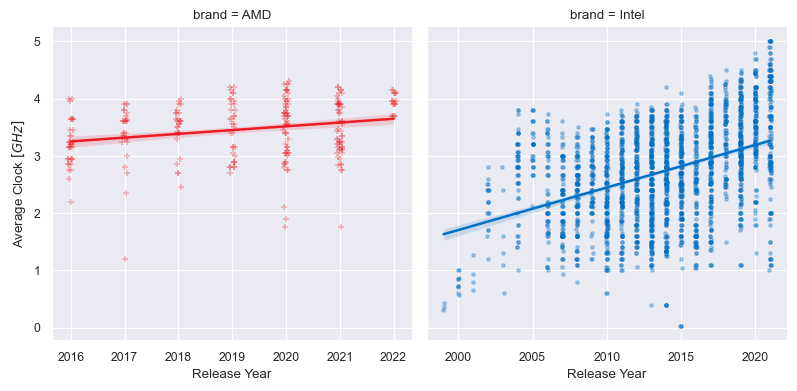

In [12]:
# Regression plotting
sns.lmplot(
    data=combined_data, x="releaseDate", y="average_clock", 
    hue="brand", col="brand",
    markers=['+', '.'], palette=brand_only_palette,
    scatter_kws={'alpha':0.3}, 
    facet_kws=dict(sharex=False, sharey=True, legend_out=True),
    x_jitter=0.05, height=4, aspect=1,
).set_axis_labels("Release Year", "Average Clock $[GHz]$")

Text(36.65, 0.5, 'Average Clock $[GHz]$')

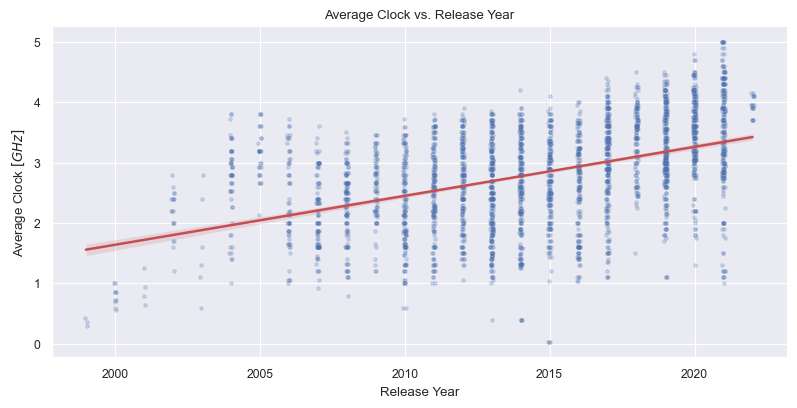

In [13]:
# Regression plotting
fig = sns.lmplot(
    data=combined_data, x="releaseDate", y="average_clock", 
    legend="auto", aspect=2, height=4, markers='.', 
    facet_kws=dict(legend_out=True), x_jitter=0.05,
    scatter_kws={'alpha':0.2}, line_kws={'color':'r'}
);


# plt.plot(avg_clock_means.releaseDate, avg_clock_means.average_clock, 'Xr-')

# plt.legend()

plt.title("Average Clock vs. Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Clock $[GHz]$")

#### Observations
From the above plots we can observe a positive correlation between ***Release Year*** and ***Average Clock*** \
_i.e._ CPU Processing Speeds increase with Time

### Relation between Cores and Clock Speed
> Cores: Number of individual Processing Units

Each CPU is made up of 1 or more 'cores'. \
'Cores' are individual processing units that can be utilized by the CPU to perform multiple tasks at the same time in _parallel_, speeding up execution of multiple processes by performing them at the **same** time as opposed to **sequentially**.

#### Plotting

In [42]:
# fig, ax = plt.subplots(ncols=2)
sns.scatterplot(combined_data, y='cores', x=['maxboostClock', 'baseClock'],
            hue='brand', alpha=.6, palette=brand_only_palette,
            style='brand',legend='full',# size='releaseDate',)
            # ax=ax[0])
               )
# sns.scatterplot(combined_data, y='cores', x='baseClock',
#             hue='brand', alpha=.6, palette=brand_only_palette,
#             style='brand',legend='full',# size='releaseDate',
#             ax=ax[1])

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 2710 and the vector passed to `x` has length 2.


# Conclusion
1. Calculations that can be performed by a CPU per second has **INCREASED $\uparrow\uparrow$** with time